<a href="https://colab.research.google.com/github/twyeh/university-physics/blob/main/%E7%B7%9A%E5%B8%B6%E9%9B%BB%E9%AB%94%E9%9B%BB%E5%A0%B4%E8%A8%88%E7%AE%97%E7%AF%84%E4%BE%8B(%E7%B9%AA%E5%9C%96).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##學習目標
學習利用 sympy 計算線帶電體的電場的空間分布函數。
###物理假設
若有一長度為 $L$ 的均勻線帶電體，其總帶電量為 $Q$，則其電荷密度為 $\lambda= Q/L$。

將此帶電棒放置於 Z 軸上，觀測點為 $(x_p,y_p,z_p)$，該點的電場為
$$\vec{E}(x_p,y_p,z_p)=k\lambda\int_{-L/2}^{L/2} dz\frac{(x_p,y_p,(z_p-z))}{(x^2_p+y^2_p+(z_p-z)^2)^{3/2}}=E_x \hat{i}+E_y \hat{j}+E_z \hat{k}$$
分別計算$E_x, E_y, E_z$。

[參考範例](https://youtu.be/2I44Y9hfQ4Q)

安裝 sympy 程式庫

In [ ]:
import sympy as smp

In [ ]:
xp,yp,zp,z,L=smp.symbols('xp yp zp z L', real=True, positive=True, polar=True)
Exfun = xp*smp.root(smp.Pow(xp,2)+smp.Pow(yp,2)+smp.Pow((zp-z),2),-smp.Rational(2,3))
Ezfun = (zp-z)*smp.root(smp.Pow(xp,2)+smp.Pow(yp,2)+smp.Pow((zp-z),2),-smp.Rational(2,3))

計算積分時，表達變數的次方，使用標準的 sympy 內建函數表達，可以增進 sympy進行計算的效率及正確性。
Pow(x, n) 次方 $x^n$，root(x, n)=  $x^{1/n}$, Rational(m,n)=$\frac{n}{m}$。


In [ ]:
smp.integrate(Exfun,(z,-L/2,L/2))

-xp*(-L/2 - zp)/(xp**2*sqrt(xp**2 + yp**2 + (-L/2 - zp)**2) + yp**2*sqrt(xp**2 + yp**2 + (-L/2 - zp)**2)) + xp*(L/2 - zp)/(xp**2*sqrt(xp**2 + yp**2 + (L/2 - zp)**2) + yp**2*sqrt(xp**2 + yp**2 + (L/2 - zp)**2))

In [ ]:
smp.integrate(Ezfun,(z,-L/2,L/2))

-1/sqrt(L**2/4 + L*zp + xp**2 + yp**2 + zp**2) + 1/sqrt(L**2/4 - L*zp + xp**2 + yp**2 + zp**2)

根據上面計算，得到
$$E_x=k\lambda
\begin{pmatrix}
 \frac{x_p(z-z_p)}{(x_p^2 + y_p^2)\sqrt{x_p^2+y_p^2+(z_p-z)^2}}
\end{pmatrix}_{z=-L/2}^{z=+L/2}$$

$$E_y=k\lambda
\begin{pmatrix}
\frac{y_p(z-z_p)}{(x_p^2 + y_p^2)\sqrt{x_p^2+y_p^2+(z_p-z)^2}}
\end{pmatrix}_{z=-L/2}^{z=+L/2}
$$

$$E_z=k\lambda
\begin{pmatrix}
\frac{1}{\sqrt{x_p^2+y_p^2+(z_p-z)^2}}
\end{pmatrix}_{z=-L/2}^{z=+L/2}
$$


小結:利用符號計算程式可以協助我們簡化分析物理問題，讓我們能專注於思考物理概念的發展，並把數學計算工作交給程式來完成。

繪圖:
繪製電場分布

匯入繪圖程式庫：
1. ipywidgets： 互動介面函數庫，包含 interact, interactive, fixed, interact_manual 等方法：
1. ipywidgets import interact, interactive, fixed, interact_manual
參考資料：https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
2. numpy：矩陣數值處理
3. matploylib.pyplot：繪圖函數庫
4. pylab：matplotlib 的繪圖模組，

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import pylab
import math
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
np.seterr(divide='ignore', invalid='ignore');

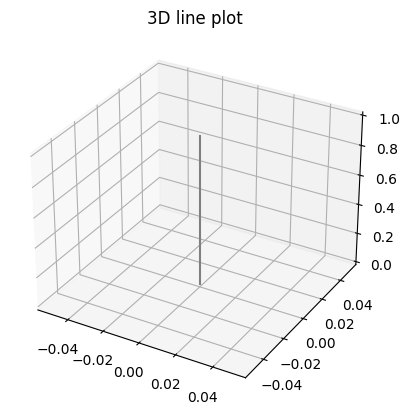

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
z = np.linspace(0, 1, 100)
x = 0*z
y = 0*z
ax.plot3D(x, y, z, 'gray')
ax.set_title('3D line plot')
plt.show()